In [1]:
import pandas as pd
import numpy as np
import py_vollib_vectorized
import matplotlib.pyplot as plt
pd.set_option("max_columns", 15)
import warnings
warnings.filterwarnings('ignore')

In [2]:
def vol_slice_extractor(date, expiry_index, middle_percent=0.8):
    
    surface_for_date = otm_options.groupby('date').get_group(date)
    expiry=list(surface_for_date.groupby('exdate').groups.keys())[expiry_index]
    vol_slice = surface_for_date.groupby('exdate').get_group(expiry).sort_values(by='strike_price').set_index('strike_price')[['bid_vols','offer_vols']]
    fwd = surface_for_date.groupby('exdate').get_group(expiry).sort_values(by='strike_price').set_index('strike_price')['impl_fw'].iat[0]

    vol_strikes = vol_slice.index
    upper = vol_strikes[vol_strikes>fwd]
    lower = vol_strikes[vol_strikes<fwd]
    upper_strike=upper[int(len(upper)*middle_percent)]
    lower_strike=lower[-int(len(lower)*middle_percent)]

    see=vol_slice[(vol_slice.index>lower_strike)&(vol_slice.index<upper_strike)]


    return vol_slice[(vol_slice.index>lower_strike)&(vol_slice.index<upper_strike)], expiry, fwd

In [3]:


filename = 'C:\\Users\\vladi\\Downloads\\optionMetricsSpx2020_1.csv'

df = pd.read_csv(filename, parse_dates=['date','exdate'], usecols=['date','exdate','cp_flag','strike_price','best_bid','best_offer','volume', 'forward_price'])#, index_col=0)


df=df[(df.best_bid > 0.) & (df.date < df.exdate)]


df.loc[:,'strike_price'] /= 1000.
df.loc[:,'cp_flag'] = df['cp_flag'].str.lower() # compatibility with lowercase p/c in py_vollib_vectorized
df['mid_price'] = (df['best_bid'] + df['best_offer']) * 0.5
df['impl_df'] = np.NaN
df['impl_fw'] = np.NaN
df.head(30)


,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,forward_price,mid_price,impl_df,impl_fw
0,2020-01-02,2020-01-17,c,1000.0,2251.6,2258.7,900,NaN,2255.15,NaN,NaN
1,2020-01-02,2020-01-17,c,1100.0,2151.7,2158.8,0,NaN,2155.25,NaN,NaN
2,2020-01-02,2020-01-17,c,1150.0,2101.7,2108.8,0,NaN,2105.25,NaN,NaN
3,2020-01-02,2020-01-17,c,1200.0,2051.8,2058.9,0,NaN,2055.35,NaN,NaN
4,2020-01-02,2020-01-17,c,1225.0,2026.8,2033.9,0,NaN,2030.35,NaN,NaN
5,2020-01-02,2020-01-17,c,1250.0,2001.8,2008.9,0,NaN,2005.35,NaN,NaN
6,2020-01-02,2020-01-17,c,1275.0,1976.9,1983.9,0,NaN,1980.40,NaN,NaN
7,2020-01-02,2020-01-17,c,1300.0,1951.9,1959.0,0,NaN,1955.45,NaN,NaN
8,2020-01-02,2020-01-17,c,1325.0,1926.9,1934.0,0,NaN,1930.45,NaN,NaN
9,2020-01-02,2020-01-17,c,1350.0,1901.9,1909.0,0,NaN,1905.45,NaN,NaN


# Implied Forward and Implied Discount Factor

$\large\text{Define}$
$$ \large
K^*
=\min_K\bigl\{ \text{ordered set of strikes }K\text{  such that } \text{Put}(K)>\text{Call}(K)\bigr\},
$$
$\large\text{and}$

$$ \large
K_* = \text{the largest strike below }K^*
$$

$\large \text{Implied Forward }F_{\text{Imp}} \text{ and Implied Docount Factor}  Df_{\text{Imp}} \text{ are defined as solutions of the linear system}$

$$ \large
\text{Call}(K) + Df_{\text{Imp}}K = \text{Put}(K)+ Df_{\text{Imp}} F_{\text{Imp}},\quad K\in\{K_*, K^*\}
$$

# Linear separability of options Bids and Asks and static arbitrage 


$\large\text{Consider bid and ask prices}$

$$\large \text{Call}_{\text{bid}}(K_i),\; i\in I,\; \text{Call}_{\text{ask}}(K_j),\; j\in J,\; \text{Put}_{\text{bid}}(K_k),\; k\in K,\; \text{Put}_{\text{ask}}(K_l),\; l\in L.
$$

$\large \text{Let }  \text{Call}_{\text{mid}}(K) \text{ be the market mid price. Then}$

$$
\large \text{Call}_{\text{mid}}(K_i)> \text{Call}_{\text{bid}}(K_i),\quad i\in I 
$$

$$
\large \text{Call}_{\text{mid}}(K_i)< \text{Call}_{\text{ask}}(K_j),\quad j\in J 
$$

$$\large
\text{Call}_{\text{mid}}(K_k)+ Df_{\text{Imp}} K_k-Df_{\text{Imp}} F_{\text{Imp}}>\large \text{Put}_{\text{ask}}(K_k),\quad k\in K 
$$

$$
\large \text{Put}_{\text{ask}}(K_l)+Df_{\text{Imp}} F_{\text{Imp}} - Df_{\text{Imp}} K_l > \text{Call}_{\text{mid}}(K_l),\quad l\in L 
$$


In [ ]:
see=df[['date','exdate','cp_flag','strike_price','mid_price']].groupby(['date','exdate'])
g_date_exdate=df.loc[:,['date','exdate','cp_flag','strike_price','mid_price']].groupby(['date','exdate'])
g_pc=df.loc[:,['date','exdate','cp_flag','strike_price','mid_price']].groupby(['cp_flag'])
call_mask=g_pc.groups['c']
put_mask=g_pc.groups['p']

In [5]:
kk=0
for k in see.groups.keys():
    #print(k)
    if not (kk%500):
        print(kk)
    kk+=1
    current_group = see.groups[k]

    see_call = df.loc[current_group & call_mask, ['strike_price', 'mid_price']]
    see_put = df.loc[current_group & put_mask, ['strike_price', 'mid_price']]

    see_call.sort_values(by='strike_price', inplace=True)
    see_call['orig_index'] = see_call.index
    see_call.set_index('strike_price', inplace=True)

    see_put.sort_values(by='strike_price', inplace=True)
    see_put['orig_index'] = see_put.index
    see_put.set_index('strike_price', inplace=True)

    if not(see_call.index.is_unique and see_put.index.is_unique):
        see_call.sort_values(by='mid_price', inplace=True)
        see_call = see_call.loc[~see_call.index.duplicated(keep='last')]
        see_put.sort_values(by='mid_price', inplace=True)
        see_put = see_put.loc[~see_put.index.duplicated(keep='last')]
    
    xx1=see_put['mid_price']-see_call['mid_price']
    if len(xx1.loc[xx1 > 0]) == 0:
        continue
    mid_strike=xx1.loc[xx1 > 0].index[0]
    mid_strike_dn=xx1.loc[xx1<=0.].index[-1]

    call_up = see_call.at[mid_strike_dn, 'mid_price']
    put_up = see_put.at[mid_strike, 'mid_price']
    call_dn = see_call.at[mid_strike, 'mid_price']
    put_dn = see_put.at[mid_strike_dn, 'mid_price']
    impl_df = (put_up + call_up - put_dn - call_dn) / (mid_strike - mid_strike_dn)
    # if mid_strike - mid_strike_dn == 0:
    #     dd=1
    impl_fw = mid_strike + (call_dn - put_up) / impl_df

    if type(impl_df) == np.ndarray:
        print('BUG')

    df.loc[current_group,'impl_df'] = impl_df
    df.loc[current_group,'impl_fw'] = impl_fw



0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500


In [6]:
otm_options = df.loc[((df.cp_flag=='c') & (df.strike_price>=df.impl_fw)) | ((df.cp_flag=='p') & (df.strike_price<=df.impl_fw))]
otm_options = otm_options[otm_options.volume>0]

time_to_expiry=(otm_options.exdate-otm_options.date).values/np.timedelta64(1, 'D')/365.
r=-np.log(otm_options['impl_df'])/time_to_expiry
spot=otm_options['impl_df']*otm_options['impl_fw']
#=otm_options['impl_fw']

bid_vols=py_vollib_vectorized.vectorized_implied_volatility(otm_options.best_bid.values, spot,  otm_options.strike_price.values,  time_to_expiry, r, otm_options.cp_flag, q=0, model='black_scholes_merton',return_as='numpy', on_error='ignore')
offer_vols=py_vollib_vectorized.vectorized_implied_volatility(otm_options.best_offer.values, spot,  otm_options.strike_price.values,  time_to_expiry, r, otm_options.cp_flag, q=0, model='black_scholes_merton',return_as='numpy', on_error='ignore')
otm_options['bid_vols'] = bid_vols
otm_options['offer_vols'] = offer_vols


In [16]:
otm_options.tail(15)

,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,forward_price,mid_price,impl_df,impl_fw,bid_vols,offer_vols
4281300,2020-12-31,2021-09-30,p,3100.0,108.2,111.5,4,NaN,109.85,1.00,3728.400000,0.283351,0.287102
4281316,2020-12-31,2021-09-30,p,3500.0,193.3,197.2,2,NaN,195.25,1.00,3728.400000,0.235830,0.239128
4281321,2020-12-31,2021-09-30,p,3625.0,229.0,233.0,2,NaN,231.00,1.00,3728.400000,0.219210,0.222412
4281430,2020-12-31,2021-12-31,c,3750.0,254.5,326.5,17,NaN,290.50,0.98,3716.836735,0.185546,0.235194
4281431,2020-12-31,2021-12-31,c,3775.0,239.5,311.5,45,NaN,275.50,0.98,3716.836735,0.182592,0.232163
4281435,2020-12-31,2021-12-31,c,3875.0,194.0,242.0,3,NaN,218.00,0.98,3716.836735,0.178353,0.211615
4281436,2020-12-31,2021-12-31,c,3900.0,180.5,228.5,4,NaN,204.50,0.98,3716.836735,0.175191,0.208629
4281440,2020-12-31,2021-12-31,c,4000.0,132.0,180.0,1,NaN,156.00,0.98,3716.836735,0.163516,0.198258
4281446,2020-12-31,2021-12-31,c,4150.0,84.5,114.5,2,NaN,99.50,0.98,3716.836735,0.155847,0.180186
4281448,2020-12-31,2021-12-31,c,4200.0,69.5,99.5,14,NaN,84.50,0.98,3716.836735,0.151436,0.177169


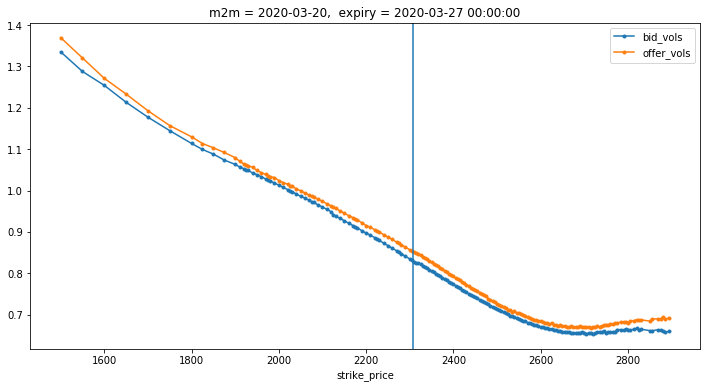

In [8]:
date_str='2020-03-20'
date=pd.Timestamp(date_str)
import matplotlib.patches as patches
first_plot=vol_slice_extractor(date,2, middle_percent=0.9)
first_plot[0].plot(style='.-', figsize=(12,6))
fwd = first_plot[2]

plt.axvline(x=fwd)
plt.title('m2m = '+date_str+',  expiry = '+str(first_plot[1]))
fig1 = plt.gcf()
#fig1.savefig('C:/Users/vladi/doc/bull_CS.png', format='png', dpi=100)
#fig1.savefig('C:/Users/vladi/doc/week_5_2019-03-22.png', format='png')
path='C:/Users/vladi/Dropbox/Volatility Course/Lectures_2021/Exercises/Monday.png'
fig1.savefig(path, format='png')


In [40]:
fig1 = plt.gcf()
#fig1.savefig('C:/Users/vladi/doc/bull_CS.png', format='png', dpi=100)
#fig1.savefig('C:/Users/vladi/doc/week_5_2019-03-22.png', format='png')
path='C:/Users/vladi/Dropbox/Volatility Course/Lectures_2021/Exercises/week_5_2019-03-22A.png'
fig1.savefig(path, format='png')

<Figure size 432x288 with 0 Axes>